In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [2]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data=pd.read_csv('pima-indians-diabetes.data',names=colnames)

In [5]:
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.tail()

,preg,plas,pres,skin,test,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
data.sample(5)

,preg,plas,pres,skin,test,mass,pedi,age,class
391,5,166,76,0,0,45.7,0.340,27,1
722,1,149,68,29,127,29.3,0.349,42,1
687,1,107,50,19,0,28.3,0.181,29,0
162,0,114,80,34,285,44.2,0.167,27,0
343,5,122,86,0,0,34.7,0.290,33,0


In [8]:
data.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [9]:
data['class']=data['class'].astype('category')

In [10]:
data.isna().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [11]:
X=data.iloc[:,:-1]
y=data[['class']]

In [14]:
X_train,x_test,Y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [21]:
pipeline=Pipeline([
    ('scaling',StandardScaler()),
    ('log',LogisticRegression())
])

In [22]:
pipeline.fit(X_train,Y_train)
yhat=pipeline.predict(x_test)
from sklearn import metrics
metrics.confusion_matrix(y_test,yhat)

E:\Anacondafiles\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([[132,  14],
       [ 36,  49]], dtype=int64)

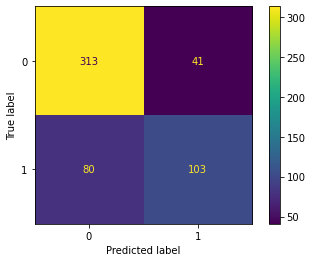

In [23]:
metrics.plot_confusion_matrix(pipeline,X_train,Y_train)